In [57]:
import os
import re
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [3]:
ml4h_inpath = './data/ML4H2018/txt/'
txt_names = [os.path.join(ml4h_inpath,f) for f in os.listdir(ml4h_inpath) if f.endswith('.txt')]

medi_inpath = './data/med-nips-2018/txt'
txt_names = txt_names + [os.path.join(medi_inpath,f) for f in os.listdir(medi_inpath) if f.endswith('.txt')]

In [4]:
def to_lower_case(lines):
    lines = [l.lower() for l in lines]
    return lines

def strip_special_chars(lines):
    lines = [re.sub('[^a-z]',' ',l) for l in lines]
    lines = [re.sub(r'\s+',' ',l) for l in lines]
    return lines

In [12]:
n_files = len(txt_names)
papers_text = {}
for i,fname in enumerate(txt_names):
    #path = os.path.join(inpath, fname)
    path = fname
    with open(path, 'r') as f:
        lines = f.readlines()
        
        # Strip the references
        reference_line = [l for l, line in enumerate(lines) if line == 'References\n']
        if len(reference_line) > 0:
            lines = lines[:reference_line[-1]]
            
        # Add other text pre-processing here.
        # 
        #
        lines = to_lower_case(lines)
        lines = strip_special_chars(lines)
        
    paper = "".join(lines)
    paper = paper.split()
    papers_text[fname] = paper

In [13]:
list(papers_text.keys())[1]

'./data/ML4H2018/txt/nipsml4h2018_paper_193.txt'

In [19]:
ml4h_papers = {k:v for k,v in papers_text.items() if k.startswith(ml4h_inpath)}
medi_papers = {k:v for k,v in papers_text.items() if k.startswith(medi_inpath)}
print(len(ml4h_papers),len(medi_papers))

166 32


In [44]:
def jaccard_similarity(set1, set2):
    """Jaccard similarity coefficient. 
    Defined as the size of the intersection divided 
    by the size of the union of two label sets."""
    intersection_size = len(set(set1).intersection(set(set2)))
    union_size = len(set(set1).union(set(set2)))
    if union_size == 0:
        return 0
    return intersection_size / float(union_size)

In [45]:
medi_papers['./data/med-nips-2018/txt/med-nips_2018_paper_109.txt'][:10]

['automating',
 'motion',
 'correction',
 'in',
 'multishot',
 'mri',
 'using',
 'generative',
 'adversarial',
 'networks']

In [61]:
jaccard_mat = np.zeros((len(papers_text), len(papers_text)))

for i, (k1, p1) in enumerate(papers_text.items()):
    for j, (k2, p2) in enumerate(papers_text.items()):
        if i == j:
            simul = 0.0
        else:
            simul = jaccard_similarity(p1,p2)
        jaccard_mat[i, j] = simul

In [56]:
labels = [k.split('/')[-1] for k,v in papers_text.items()]

In [65]:
df = pd.DataFrame(jaccard_mat)
df.columns = labels
df.index = labels

In [59]:
df.to_clipboard()

In [66]:
df.head()

,nipsml4h2018_paper_187.txt,nipsml4h2018_paper_193.txt,nipsml4h2018_paper_144.txt,nipsml4h2018_paper_178.txt,nipsml4h2018_paper_232.txt,nipsml4h2018_paper_226.txt,nipsml4h2018_paper_99.txt,nipsml4h2018_paper_66.txt,nipsml4h2018_paper_72.txt,nipsml4h2018_paper_98.txt,...,med-nips_2018_paper_83.txt,med-nips_2018_paper_95.txt,med-nips_2018_paper_56.txt,med-nips_2018_paper_42.txt,med-nips_2018_paper_57.txt,med-nips_2018_paper_106.txt,med-nips_2018_paper_90.txt,med-nips_2018_paper_85.txt,med-nips_2018_paper_107.txt,med-nips_2018_paper_105.txt
nipsml4h2018_paper_187.txt,0.000000,0.201717,0.189130,0.175956,0.189217,0.197964,0.194175,0.183333,0.139124,0.200495,...,0.169978,0.181607,0.0,0.160347,0.185414,0.122807,0.156313,0.166287,0.151450,0.177907
nipsml4h2018_paper_193.txt,0.201717,0.000000,0.191530,0.200787,0.180755,0.213925,0.175752,0.198502,0.163090,0.204324,...,0.176931,0.193615,0.0,0.176186,0.180942,0.151717,0.164126,0.179798,0.166987,0.192784
nipsml4h2018_paper_144.txt,0.189130,0.191530,0.000000,0.210953,0.196097,0.178178,0.195122,0.209257,0.142041,0.186478,...,0.180361,0.204038,0.0,0.172584,0.200669,0.169550,0.171271,0.189583,0.194779,0.196825
nipsml4h2018_paper_178.txt,0.175956,0.200787,0.210953,0.000000,0.202844,0.201036,0.178711,0.218935,0.135678,0.182320,...,0.182467,0.213275,0.0,0.171000,0.192568,0.160839,0.165428,0.193206,0.185035,0.189103
nipsml4h2018_paper_232.txt,0.189217,0.180755,0.196097,0.202844,0.000000,0.188984,0.183971,0.207084,0.138681,0.171198,...,0.169935,0.169409,0.0,0.169288,0.165992,0.140314,0.176419,0.164593,0.175651,0.164093


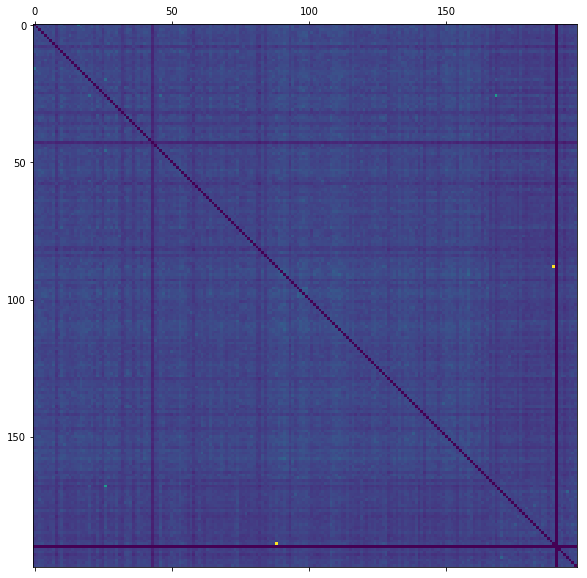

In [75]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.matshow(df)

- What's the most unique paper?
- There's at least one paper that was presented in both that is _very_ similar
- Are ml4h papers more like each other than like medi papers?